## Análise Exploratória de Dados dos Vingadores: Padrões de Mortalidade e Ressurreição

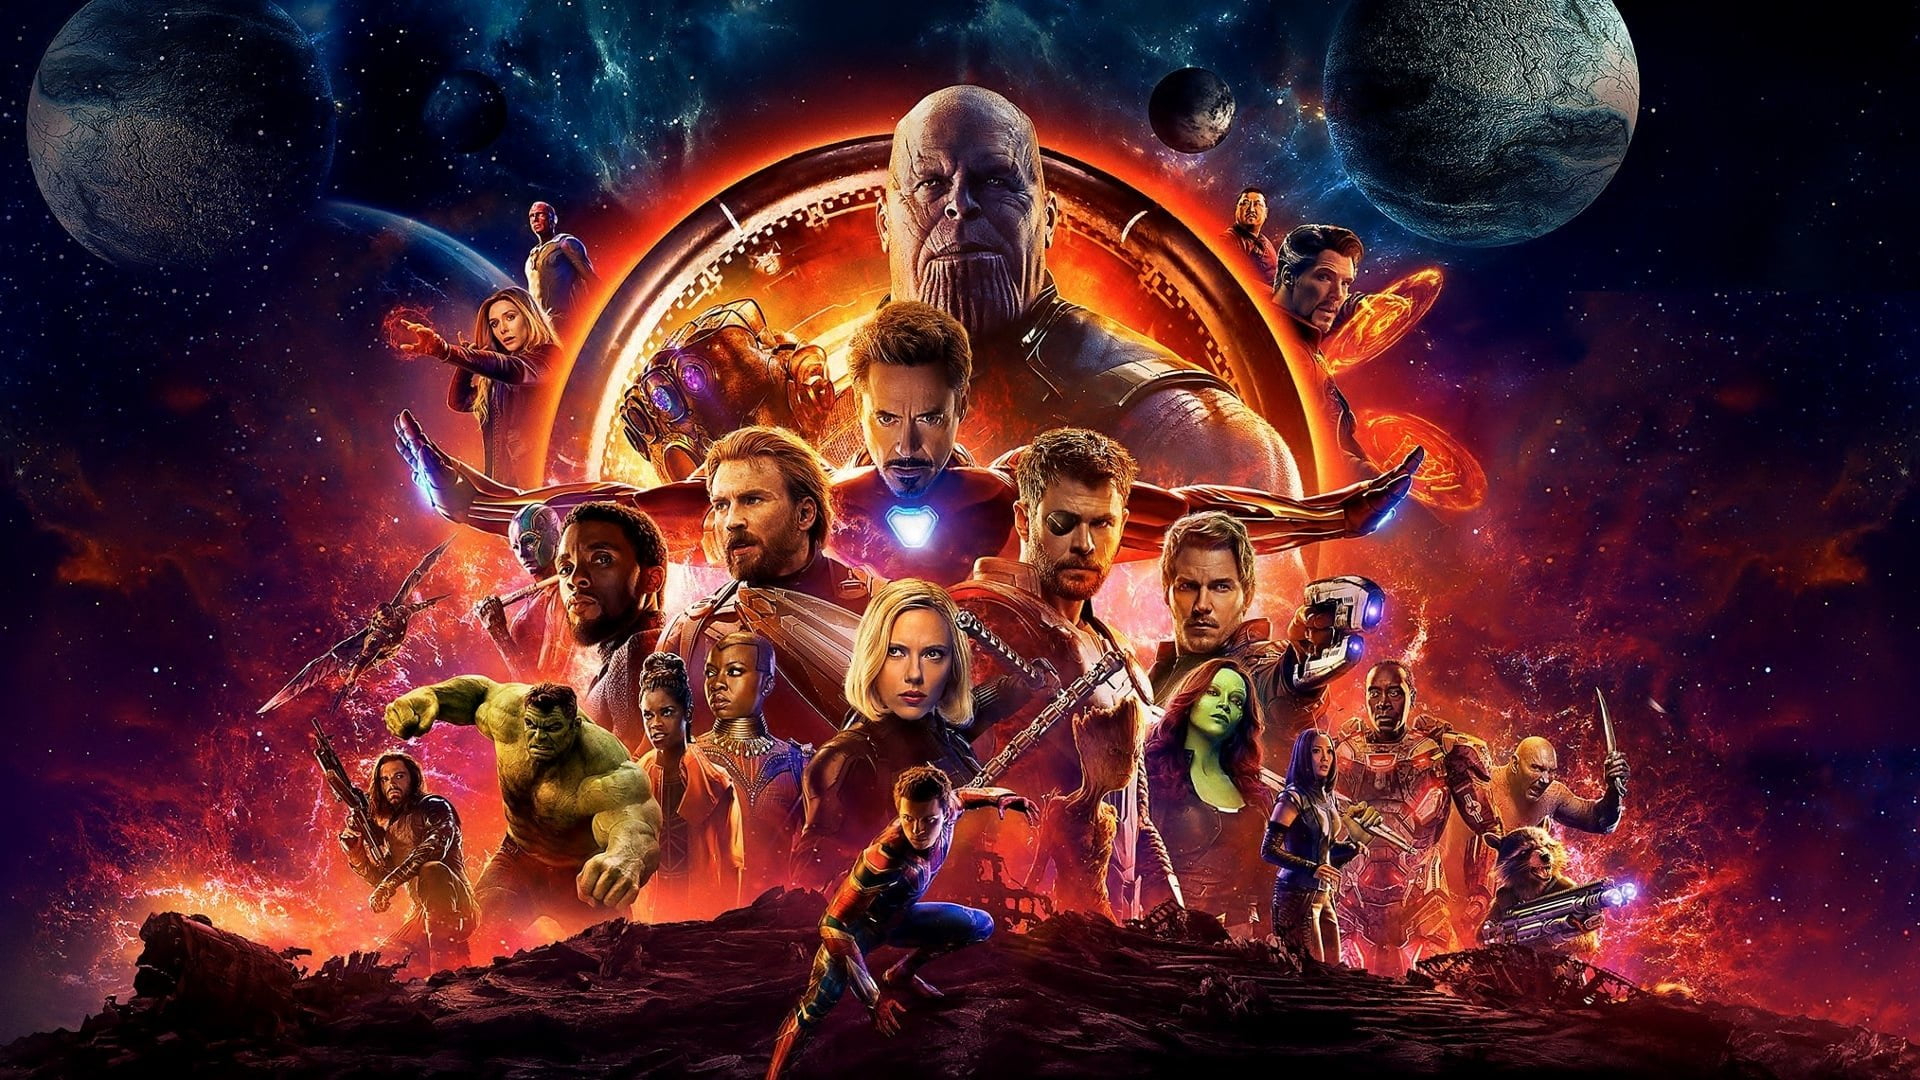

## Descrição do Projeto:

Este projeto, inspirado no e-book de projetos da Universidade dos Dados, tem como objetivo explorar e responder perguntas sobre a trajetória dos membros dos Vingadores ao longo dos anos. Através de uma análise detalhada, investiguei a relação entre número de aparições, status dentro da equipe e eventos de morte e ressurreição.

Busquei responder questões como: quais personagens mais morrem? Há padrões de ressurreição? Existe uma relação entre tempo de equipe e taxa de mortalidade?

Utilizando técnicas de análise de dados, este estudo revela insights sobre os altos e baixos da vida heroica no universo Marvel. 🚀🔥

## 0. Importações

### 0.1 Bibliotecas

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Análise estatística
from scipy import stats
import statsmodels.api as sm

import warnings

### 0.2 Configurações

In [2]:
warnings.filterwarnings('ignore')

### Pandas Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

### Configuração paleta de cores - Vingadores
avengers_palette = ['#b11313', '#0c1e8b', '#044B20', '#F2B705', '#690f67', '#ff6d00']
px.defaults.color_discrete_sequence = avengers_palette

### 0.3 Dados

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv", encoding="ISO-8859-1")

## 1. Descrição dos dados

In [4]:
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


### 1.1 Dimensão dos dados

In [5]:
df.shape

(173, 21)

### 1.2 Colunas

| Nome da Coluna                  | Descrição                                                                                             |
|--------------------------------|-------------------------------------------------------------------------------------------------------|
| URL                            | URL do personagem nos quadrinhos, conforme listado na Marvel Wikia.                                  |
| Name/Alias                     | Nome completo ou codinome do personagem.                                                              |
| Appearances                    | Número de edições em que o personagem apareceu até 30 de abril de 2015.                              |
| Current?                       | Indica se o personagem está atualmente ativo em alguma equipe afiliada aos Vingadores.               |
| Gender                         | Gênero registrado do personagem.                                                                     |
| Probationary                   | Data em que o personagem recebeu status provisório como membro dos Vingadores.                       |
| Full/Reserve                   | Mês e ano em que o personagem foi introduzido como membro titular ou reserva dos Vingadores.         |
| Year                           | Ano em que o personagem foi introduzido como membro titular ou reserva dos Vingadores.               |
| Years since joining            | Quantidade de anos desde que o personagem entrou para os Vingadores (2015 - ano de entrada).         |
| Honorary                       | Status honorário do personagem (ex: "Honorário", "Academia" ou "Titular").                          |
| Death1                         | Indica se o personagem morreu pela primeira vez.                                                     |
| Return1                        | Indica se o personagem retornou da sua primeira morte.                                               |
| Death2                         | Indica se o personagem morreu uma segunda vez após retornar.                                         |
| Return2                        | Indica se o personagem retornou da sua segunda morte.                                                |
| Death3                         | Indica se o personagem morreu uma terceira vez após retornar.                                        |
| Return3                        | Indica se o personagem retornou da sua terceira morte.                                               |
| Death4                         | Indica se o personagem morreu uma quarta vez após retornar.                                          |
| Return4                        | Indica se o personagem retornou da sua quarta morte.                                                 |
| Death5                         | Indica se o personagem morreu uma quinta vez após retornar.                                          |
| Return5                        | Indica se o personagem retornou da sua quinta morte.                                                 |
| Notes                          | Notas descritivas sobre mortes e ressurreições do personagem.                                        |

### 1.3 Tipos dos dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

## 2. Pré-processamento de dados

### 2.1 Renomeando o nome das colunas

In [7]:
df.columns = [
    'url', 'name_alias', 'appearances', 'current', 'gender',
    'probationary_intro', 'full_reserve_intro', 'year', 'years_since_joining',
    'honorary', 'death1', 'return1', 'death2', 'return2',
    'death3', 'return3', 'death4', 'return4', 'death5', 'return5',
    'notes'
]

### 2.2 Verificando e tratando valores nulos

In [8]:
# Criando um dicionário para armazenar as contagens de valores nulos e porcentagens
null_info = {'Coluna': [], 'Valores Nulos': [], '% de Nulos': []}

# Iterando sobre as colunas do DataFrame
for col in df.columns:
    null_count = df[col].isna().sum()
    null_percentage = (null_count / len(df)) * 100

    # Adicionando os dados ao dicionário
    null_info['Coluna'].append(col)
    null_info['Valores Nulos'].append(null_count)
    null_info['% de Nulos'].append(null_percentage)

# Criando um DataFrame com os resultados
null_values = pd.DataFrame(null_info)

# Ordenando os valores nulos em ordem decrescente
null_values = null_values.sort_values(by='Valores Nulos', ascending=False)

# Exibindo os valores nulos
print(null_values)

                 Coluna  Valores Nulos  % de Nulos
19              return5            172      99.422
18               death5            172      99.422
17              return4            172      99.422
16               death4            172      99.422
15              return3            171      98.844
14               death3            171      98.844
5    probationary_intro            158      91.329
13              return2            157      90.751
12               death2            156      90.173
11              return1            104      60.116
20                notes             98      56.647
6    full_reserve_intro             14       8.092
1            name_alias             10       5.780
0                   url              0       0.000
9              honorary              0       0.000
8   years_since_joining              0       0.000
7                  year              0       0.000
4                gender              0       0.000
3               current        

In [9]:
# Preencher valores faltantes da coluna return1 com "No"
df['return1'] = df['return1'].fillna('No')

In [10]:
# Converter os valores das colunas death1 e return1 para numéricos (Yes → 1, No → 0)
df['death1'] = df['death1'].map({'YES': 1, 'NO': 0})
df['return1'] = df['return1'].map({'YES': 1, 'NO': 0})

In [11]:
df_clean = df.dropna(subset=['name_alias'])

In [12]:
# Selecionando atributos categóricos
cat_attributes = df.select_dtypes(include=['object'])

# Contagem de valores únicos
unique_counts = cat_attributes.nunique()

# Exibindo os resultados
print(unique_counts)

url                   173
name_alias            162
current                 2
gender                  2
probationary_intro     12
full_reserve_intro     93
honorary                4
death2                  2
return2                 2
death3                  1
return3                 2
death4                  1
return4                 1
death5                  1
return5                 1
notes                  71
dtype: int64


## 3. Análise Exploratória de Dados

### 3.1 Quantos heróis temos nesse conjunto de dados?

In [13]:
total_herois = df.shape[0]
print(f"Total de heróis: {total_herois}")

Total de heróis: 173


### 3.2 Qual a distribuição de gênero dos personagens?

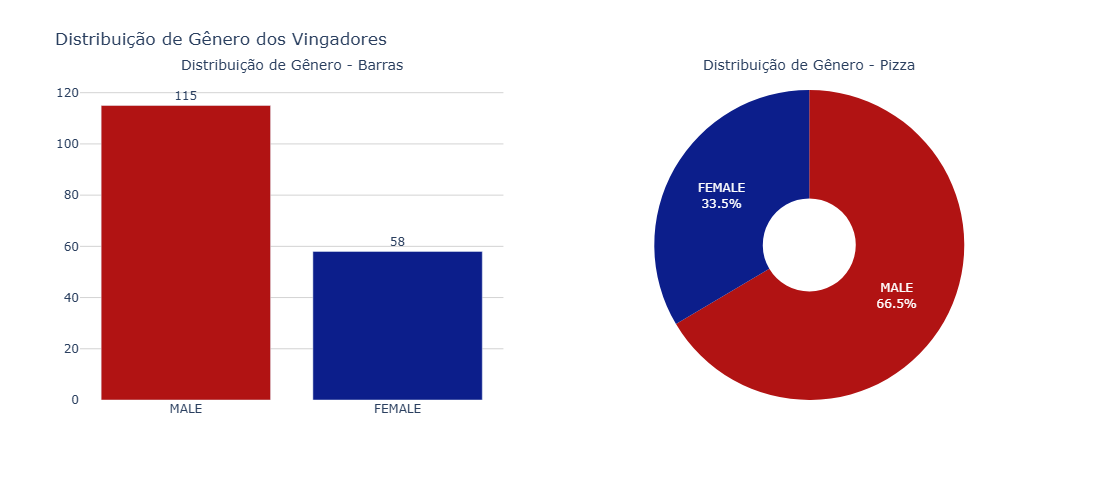

In [16]:
# Contagem de personagens por gênero
gender_count = df['gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']

# Paleta de cores
colors = avengers_palette

# Subplots com títulos separados
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Distribuição de Gênero - Barras", "Distribuição de Gênero - Pizza"),
    specs=[[{"type": "bar"}, {"type": "pie"}]]
)

# Gráfico de Barras
fig.add_trace(
    go.Bar(
        x=gender_count['Gender'],
        y=gender_count['Count'],
        text=gender_count['Count'],
        textposition='outside',
        marker_color=colors,
        showlegend=False
    ),
    row=1, col=1
)

# Gráfico de Pizza
fig.add_trace(
    go.Pie(
        labels=gender_count['Gender'],
        values=gender_count['Count'],
        marker=dict(colors=colors),
        textinfo='label+percent',
        showlegend=False,
        hole=0.3
    ),
    row=1, col=2
)

# Layout com espaço extra entre os títulos e os gráficos
fig.update_layout(
    height=480,
    width=850,
    title_text="Distribuição de Gênero dos Vingadores",
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(t=90),  # top margin aumenta distância do título principal
)

# Espaçamento dos títulos dos subplots
fig.update_annotations(font_size=14, yshift=15)

# Grade e ajustes visuais do eixo
fig.update_yaxes(
    showgrid=True,
    gridcolor='lightgrey',
    zeroline=False,
    row=1, col=1,
    title_standoff=20
)

fig.update_xaxes(
    showgrid=False,
    row=1, col=1,
    title_standoff=20
)

fig.show()

# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/avengers/images/fig_1.png', width=1200, height=700, scale=3)

### 3.3 Qual é a média de aparições dos personagens?

In [15]:
# Média de aparições
average_appearances = df['appearances'].mean()
print(f'Média de aparições: {average_appearances:.2f}')

Média de aparições: 414.05


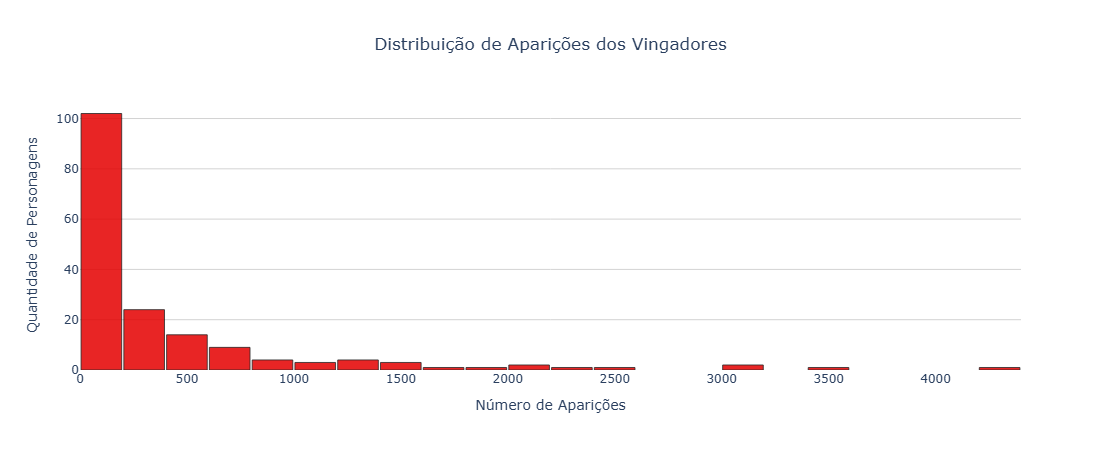

In [17]:
fig = px.histogram(
    df,
    x='appearances',
    nbins=30,
    title='Distribuição de Aparições dos Vingadores',
    color_discrete_sequence=['#e40000'],
    opacity=0.85
)

# Atualizações de layout
fig.update_layout(
    xaxis_title='Número de Aparições',
    yaxis_title='Quantidade de Personagens',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=700,
    height=450,
    bargap=0.05,  # Espaço entre as barras
    title_x=0.5,  # Centraliza o título
    font=dict(size=12),
    xaxis=dict(
        showgrid=False
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey'
    )
)

# Adiciona contornos nas barras
fig.update_traces(marker_line_color='black', marker_line_width=0.8)

fig.show()


# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_2.png', width=1200, height=700, scale=3)

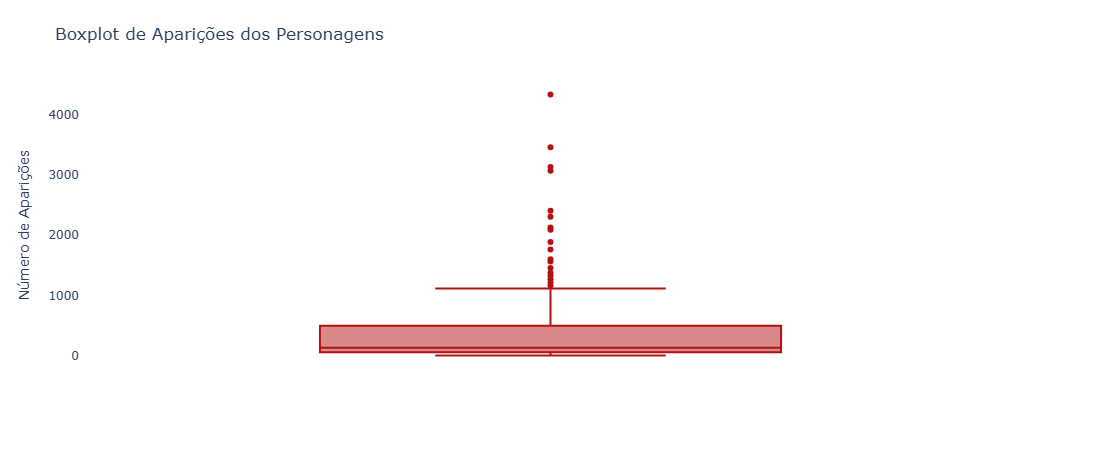

In [18]:
fig = px.box(
    df,
    y='appearances',
    points='outliers',
    color_discrete_sequence=avengers_palette,
    title='Boxplot de Aparições dos Personagens'
)

# Ajustes de layout
fig.update_layout(
    yaxis_title='Número de Aparições',
    xaxis_showticklabels=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=450,
    width=700,
    margin=dict(t=80)  # distância do título para o gráfico
)

fig.show()


# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_3.png', width=1200, height=700, scale=3)

- A maioria dos personagens aparece em poucos quadrinhos ou histórias, enquanto um pequeno grupo de personagens muito populares aparece em centenas ou até milhares de vezes.

- Como 75% dos personagens têm menos de 500 aparições, fica claro que há uma grande concentração de visibilidade em poucos personagens.

### 3.4 Qual a distribuição de aparições por gênero?

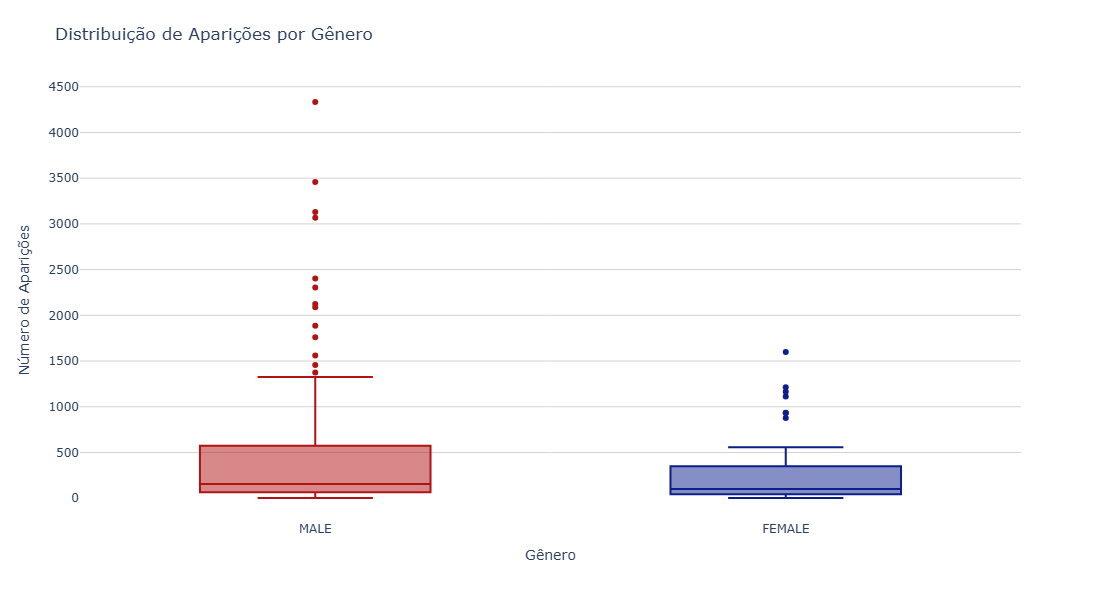

In [19]:
# Remover linhas com dados nulos nas colunas usadas
df_gender_appearances = df[['gender', 'appearances']].dropna()

fig = px.box(
    df_gender_appearances,
    x='gender',
    y='appearances',
    color='gender',
    title='Distribuição de Aparições por Gênero',
    color_discrete_sequence=avengers_palette,
    points='outliers'
)

# Layout com grid no eixo Y
fig.update_layout(
    xaxis_title='Gênero',
    yaxis_title='Número de Aparições',
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=600,
    width=800,
    margin=dict(t=80),
    showlegend=False,
    yaxis=dict(
        showgrid=True,
        gridcolor='lightgrey'
    ),
    xaxis=dict(
        showgrid=False
    )
)

fig.show()


# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_4.png', width=1200, height=700, scale=3)

- Personagens masculinos têm, em média, 490 aparições, quase o dobro da média de personagens femininos, que é de 263. Isso indica uma **maior representatividade e recorrência dos personagens homens nas HQs e conteúdos analisados.**

- O número máximo de aparições para homens é de 4333, contra 1598 para mulheres. Isso mostra que **os personagens mais recorrentes e importantes na narrativa são, predominantemente, homens.**

- Os personagens masculinos não só aparecem mais frequentemente nas histórias, como também apresentam uma maior variação no número de aparições, refletindo uma predominância masculina nos papéis de maior destaque. Já os personagens femininos tendem a ter menos aparições e menos dispersão, o que pode indicar papéis mais secundários ou menos recorrentes nas narrativas da franquia.

### 3.5 Quais são os personagens que mais aparecem?

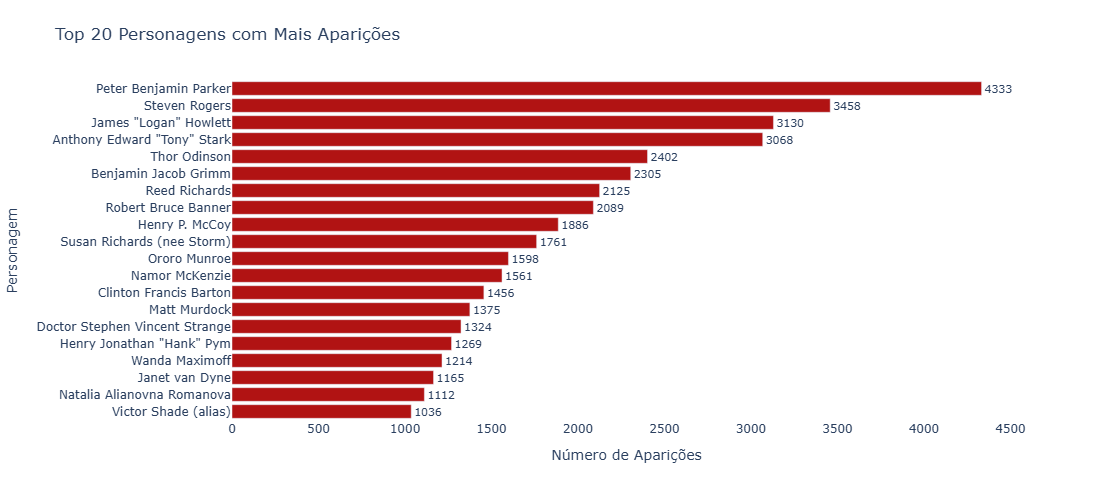

In [20]:
# Top 20 personagens com mais aparições
top_characters = df[['name_alias', 'appearances']].sort_values(by='appearances', ascending=False).head(20)

# Gráfico de barras horizontal
fig = px.bar(
    top_characters,
    x='appearances',
    y='name_alias',
    orientation='h',
    text='appearances',
    title='Top 20 Personagens com Mais Aparições',
    color_discrete_sequence=[avengers_palette[0]]
)

# Layout visual
fig.update_layout(
    xaxis_title='Número de Aparições',
    yaxis_title='Personagem',
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=500,
    width=950,
    margin=dict(t=80),
    yaxis=dict(autorange="reversed")  # Deixa o personagem com mais aparições no topo
)

fig.update_traces(textposition='outside')
fig.show()


# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_5.png', width=1200, height=700, scale=3)

A análise das aparições mostra que os personagens mais presentes nas edições da Marvel são figuras centrais do universo dos Vingadores. O top 5 é composto por heróis extremamente populares e com papel recorrente nas histórias:

*   Peter Parker (Homem-Aranha)
*   Steven Rogers (Capitão América)
*   James Logan Howlett (Wolverine)
*   Tony Stark (Homem de Ferro)
*   Thor

Além disso, são heróis que protagonizaram não só histórias em grupo, mas também séries solo, o que naturalmente contribui para o número elevado de aparições. O destaque de Peter Parker no topo, por exemplo, mostra o quanto o Homem-Aranha transcende diferentes equipes e linhas narrativas da Marvel.

### 3.5 Como a adesão dos heróis ao grupo dos Avengers ao longo dos anos se modificou?

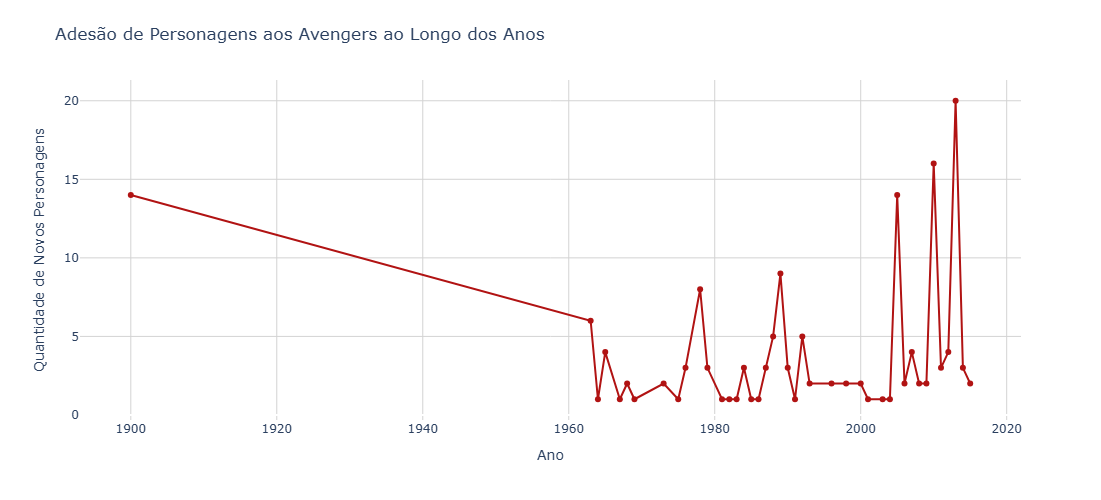

In [21]:
# Contar o número de personagens por ano com base na coluna name_alias
heroes_per_year = df.groupby('year')['name_alias'].count().reset_index()
heroes_per_year.columns = ['year', 'num_characters']

fig = px.line(
    heroes_per_year,
    x='year',
    y='num_characters',
    markers=True,
    title='Adesão de Personagens aos Avengers ao Longo dos Anos',
    labels={'year': 'Ano', 'num_characters': 'Quantidade de Novos Personagens'},
    color_discrete_sequence=[avengers_palette[0]]
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    margin=dict(t=80),
    height=500,
    width=800
)

fig.show()


# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_6.png', width=1200, height=700, scale=3)

- A partir dos anos 2000, especialmente entre 2010 e 2015, houve um aumento expressivo na inclusão de novos personagens. Esse movimento pode estar relacionado à expansão do universo Marvel nos cinemas, com o crescimento do MCU (Marvel Cinematic Universe).

- A adesão de novos personagens aos Vingadores apresenta um crescimento significativo a partir dos anos 2000, com picos mais acentuados nos anos que coincidem com a popularização dos filmes da Marvel. A distribuição desigual ao longo do tempo mostra como o grupo evoluiu: de uma equipe clássica e enxuta para um universo extenso e diversificado de heróis.

### 3.5.1 Investigação de inconsistências nos dados

Apesar da Marvel ter sido fundada em 1939, encontramos 14 personagens com o ano de adesão em 1900, o que indica uma possível inconsistência nos dados. Esse valor pode ter sido usado como placeholder para anos desconhecidos ou inserido incorretamente.

Por isso, optei por remover essas entradas para garantir uma análise temporal mais confiável.

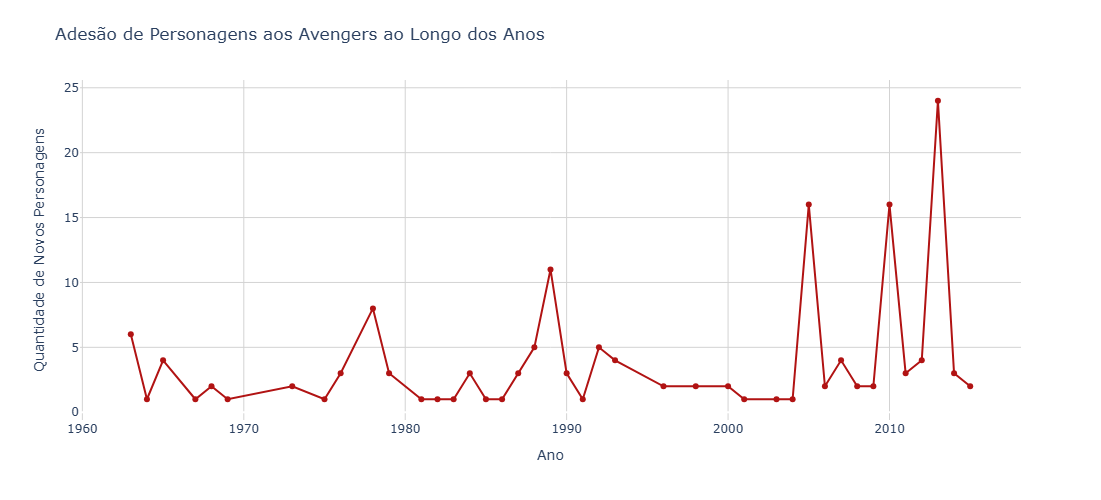

In [22]:
# Filtrar os dados, excluindo registros com ano 1900
df_valid_years = df[df['year'] > 1939] 

# Contar personagens por ano (dados corrigidos)
heroes_per_year_clean = df_valid_years.groupby('year').size().reset_index(name='num_characters')

# Gráfico de linha com anos válidos
fig = px.line(
    heroes_per_year_clean,
    x='year',
    y='num_characters',
    markers=True,
    title='Adesão de Personagens aos Avengers ao Longo dos Anos',
    labels={'year': 'Ano', 'num_characters': 'Quantidade de Novos Personagens'},
    color_discrete_sequence=[avengers_palette[0]]
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    margin=dict(t=80),
    height=500,
    width=800
)

fig.show()

# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_61.png', width=1200, height=700, scale=3)

### 3.6 Evolução da Distribuição de Gênero por Década

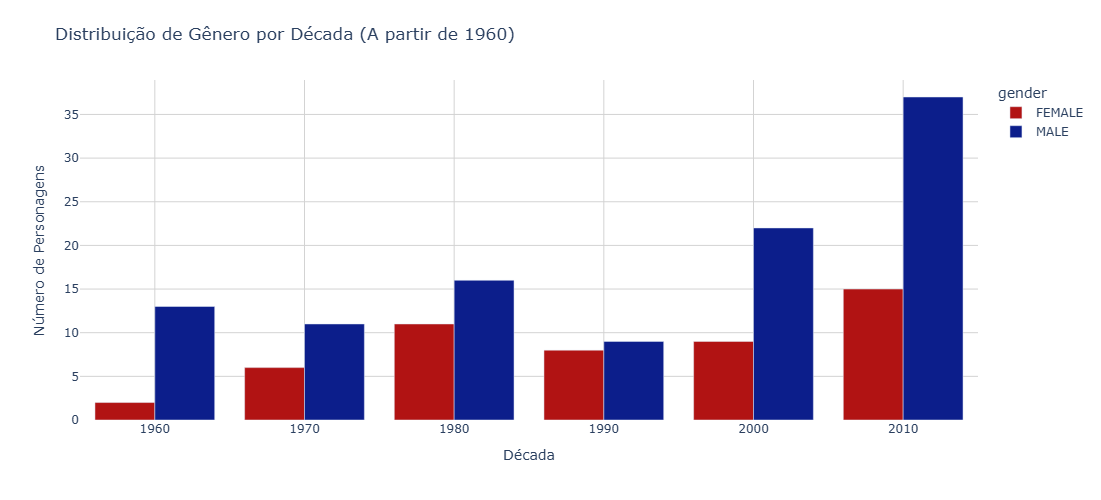

In [23]:
# Criar coluna de década
df['decade'] = (df['year'] // 10) * 10

# Filtrar apenas décadas a partir de 1960 e remover nulos
df_gender_decade = df[['gender', 'decade']].dropna()
df_gender_decade = df_gender_decade[df_gender_decade['decade'] >= 1960]

# Contar personagens por década e gênero
gender_by_decade = df_gender_decade.groupby(['decade', 'gender']).size().reset_index(name='count')

# Gráfico de barras
fig = px.bar(
    gender_by_decade,
    x='decade',
    y='count',
    color='gender',
    barmode='group',
    title='Distribuição de Gênero por Década (A partir de 1960)',
    labels={'decade': 'Década', 'count': 'Número de Personagens'},
    color_discrete_sequence=avengers_palette
)

# Layout visual
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    margin=dict(t=80),
    height=500,
    width=800
)

fig.show()


# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_7.png', width=1200, height=700, scale=3)

- Ao longo do tempo, o número total de personagens cresceu consideravelmente. Apesar disso, a discrepância entre os gêneros permanece, embora com sinais de redução gradual.
- Nos anos 1960, havia mais de 6 homens para cada mulher. Já em 2010, essa relação caiu para cerca de 2,5 homens por mulher, mostrando um avanço na inclusão de personagens femininas.
- Apesar desse progresso, o número de personagens masculinos segue crescendo em ritmo mais acelerado, mantendo-os como maioria. A década de 2010 representa um marco, com o maior número de personagens femininos registrados até então, o que pode refletir um movimento mais recente por maior representatividade de gênero nos quadrinhos.

### 3.7 Existe alguma diferença na proporção de personagens honorários para cada um dos gêneros?

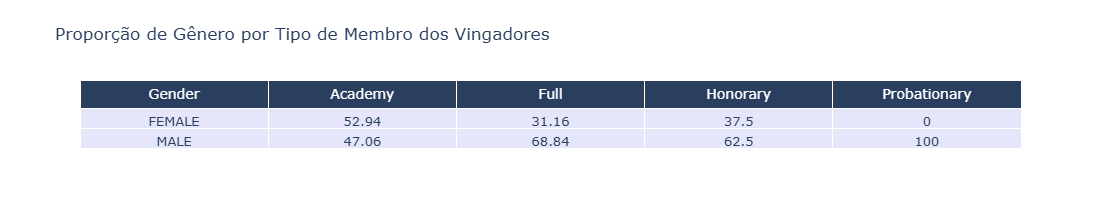

In [24]:
# Preparar os dados (frequência relativa por coluna Honorary)
df_honorary = df[['gender', 'honorary']].dropna()
freq_prop = pd.crosstab(df_honorary['gender'], df_honorary['honorary'], normalize='columns') * 100
freq_prop = freq_prop.round(2)  # Arredonda para duas casas decimais

# Reorganizar a ordem das colunas se necessário
colunas_ordenadas = ['Academy', 'Full', 'Honorary', 'Probationary']
freq_prop = freq_prop.reindex(columns=colunas_ordenadas)

# Criar tabela estilizada com Plotly
header = ['Gender'] + list(freq_prop.columns)
cells = [[gender] + list(freq_prop.loc[gender]) for gender in freq_prop.index]

fig = go.Figure(data=[
    go.Table(
        header=dict(
            values=header,
            fill_color='#2A3F5F',
            font=dict(color='white', size=14),
            align='center'
        ),
        cells=dict(
            values=list(zip(*cells)),
            fill_color='lavender',
            align='center',
            font=dict(size=13)
        )
    )
])

fig.update_layout(
    title='Proporção de Gênero por Tipo de Membro dos Vingadores',
    margin=dict(t=80, b=30),
    height=200
)

fig.show()


# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_8.png', width=1200, height=700, scale=3)

- Apesar da predominância masculina entre os membros dos Vingadores, a categoria **Honorary Academy** apresenta uma participação feminina ligeiramente maior. 

- No entanto, à medida que avançamos para categorias com maior participação ativa na história, como **Full** e **Honorary**, a proporção de personagens masculinos aumenta significativamente. 

- Notavelmente, na categoria **Probationary**, todos os personagens são homens, o que pode indicar um viés de gênero na atribuição dessa categoria, intencional ou não.

#### 🔍 Explicação das categorias:
- **Full**: membros oficiais, com participação ativa nas histórias e missões dos Vingadores. São os "principais" heróis.
- **Honorary**: membros honorários, que já ajudaram os Vingadores, mas não fazem parte oficialmente do grupo.
- **Academy**: membros em treinamento, geralmente jovens heróis sendo preparados para futuramente se tornarem membros plenos.
- **Probationary**: membros em período de teste, com participação limitada até se provarem aptos a se tornar membros completos.

### 3.8 Há diferença entre os gêneros no número de mortes e nas taxas de retorno dos personagens?”
- Quantos morreram por gênero.
- Dentre os que morreram, qual a taxa de retorno (ressurreição) por gênero..

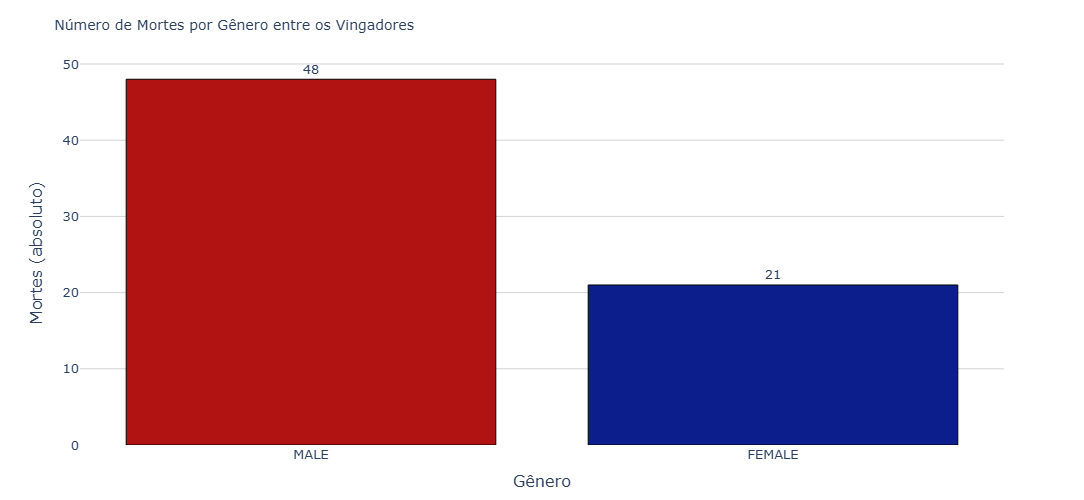

In [25]:
# Filtrar personagens com morte confirmada
df_deaths = df[df['death1'] == 1]

# Contar mortes por gênero
death_counts = df_deaths['gender'].value_counts().reset_index()
death_counts.columns = ['gender', 'num_deaths']

# Gráfico de barras melhorado
fig1 = px.bar(
    death_counts.sort_values('num_deaths', ascending=False),
    x='gender',
    y='num_deaths',
    color='gender',
    text='num_deaths',
    title='Número de Mortes por Gênero entre os Vingadores',
    color_discrete_sequence=avengers_palette
)

# Estilizando o gráfico
fig1.update_traces(
    textposition='outside',
    marker=dict(line=dict(color='black', width=1))  # borda nas barras
)

fig1.update_layout(
    xaxis_title='Gênero',
    yaxis_title='Mortes (absoluto)',
    title_font_size=14,
    font=dict(size=13),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(t=60, b=40),
    height=500,
    width=700,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray')  # Grid horizontal leve
)


fig1.show()


# Salvando o gráfico como uma imagem PNG
fig1.write_image('C:/Users/Rubeus/Documents/tcc/images/fig_9.png', width=1200, height=700, scale=3)

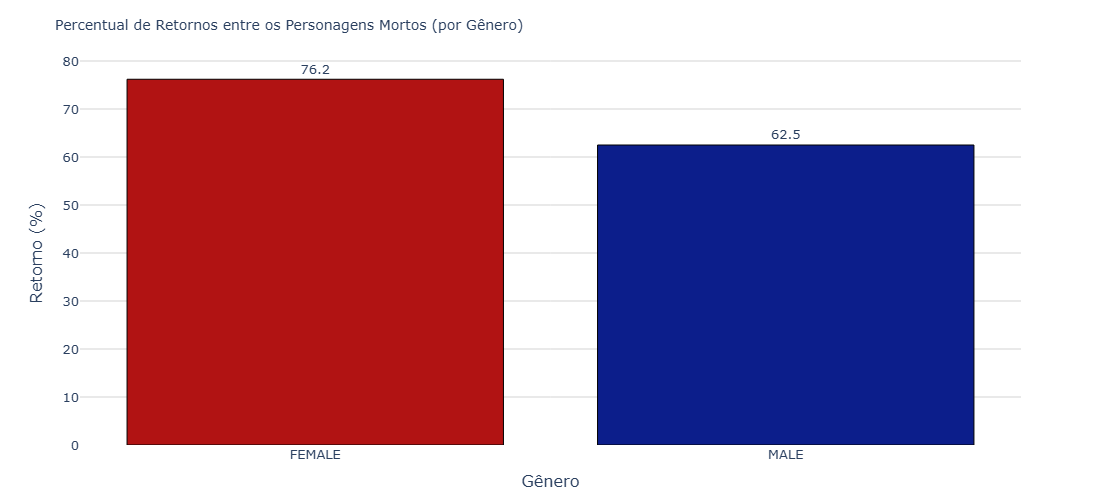

In [26]:
# Agrupar por gênero: total de mortos + quantos voltaram
summary = df[df['death1'] == 1].groupby('gender')[['return1']].agg(
    total_deaths=('return1', 'count'),
    total_returns=('return1', 'sum')
).reset_index()

# Calcular percentual de retorno
summary['return_rate'] = (summary['total_returns'] / summary['total_deaths'] * 100).round(1)

# Gráfico de barras para retorno
fig2 = px.bar(
    summary.sort_values('return_rate', ascending=False),
    x='gender',
    y='return_rate',
    color='gender',
    text='return_rate',
    title='Percentual de Retornos entre os Personagens Mortos (por Gênero)',
    color_discrete_sequence=avengers_palette 
)

fig2.update_traces(
    textposition='outside',
    marker=dict(line=dict(color='black', width=1))  # borda nas barras
)

fig2.update_layout(
    xaxis_title='Gênero',
    yaxis_title='Retorno (%)',
    title_font_size=14,
    font=dict(size=13),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(t=60, b=40),
    height=500,
    width=700,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray')  # Grid horizontal leve
)

fig2.show()


# Salvando o gráfico como uma imagem PNG
fig2.write_image('C:/Users/Rubeus/Documents/avengers/images/fig_91.png', width=1200, height=700, scale=3)

- Em termos absolutos, personagens do gênero masculino morreram mais vezes que os do gênero feminino.

- Apesar de as mulheres morrerem menos, elas retornam proporcionalmente mais do que os homens. Essa diferença pode sugerir uma maior valorização de personagens femininas mortas na narrativa, resultando em mais “ressurreições”.

### 3.9 Análise de Mortalidade por Quartil de Aparições

In [28]:
# Criar a coluna de quartil
df['appearances_quartile'] = pd.qcut(df['appearances'], q=4, labels=['1º Quartil', '2º Quartil', '3º Quartil', '4º Quartil'])

# Agrupar por quartil e calcular a média de mortes
quartil_mortality = df.groupby('appearances_quartile')['death1'].mean().reset_index()
quartil_mortality.columns = ['Quartil de Aparições', 'Percentual de Mortes']
quartil_mortality['Percentual de Mortes'] = (quartil_mortality['Percentual de Mortes'] * 100).round(1)

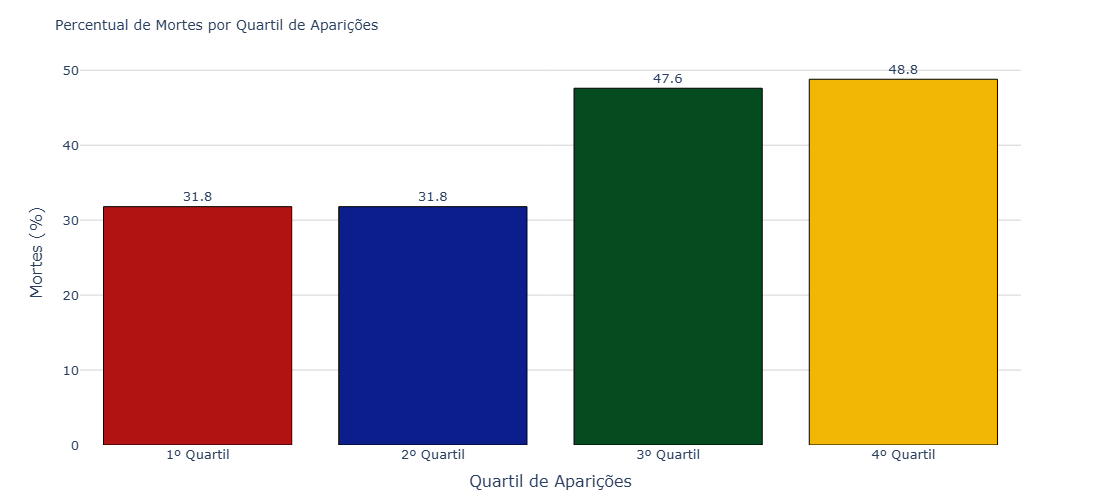

In [29]:
fig = px.bar(
    quartil_mortality,
    x='Quartil de Aparições',
    y='Percentual de Mortes',
    text='Percentual de Mortes',
    color='Quartil de Aparições',
    color_discrete_sequence=avengers_palette,  
    title='Percentual de Mortes por Quartil de Aparições'
)

fig.update_traces(
    textposition='outside',
    marker=dict(line=dict(color='black', width=1))
)

fig.update_layout(
    xaxis_title='Quartil de Aparições',
    yaxis_title='Mortes (%)',
    title_font_size=14,
    font=dict(size=13),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False,
    margin=dict(t=60, b=40),
    height=500,
    width=700,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)

fig.show()

# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/avengers/images/fig_10.png', width=1200, height=700, scale=3)

- O senso comum poderia sugerir que personagens com maior destaque (mais aparições) são “protegidos” pelas narrativas por serem mais populares e valiosos comercialmente. Mas os dados mostram o oposto.

- A taxa de mortalidade sobe significativamente nos 3º e 4º quartis, chegando a quase 49% no grupo dos personagens mais presentes.

- Nos dois primeiros quartis, vemos uma taxa constante de 31,8% de mortes. Isso sugere que personagens menos utilizados também são descartados com frequência, o que pode indicar: eliminação de personagens pouco relevantes, falta de desenvolvimento profundo ou simplificação do universo em momentos de reestruturação editorial.

### 3.10 A média de aparições dos personagens varia de acordo com o gênero e com a ocorrência de morte?

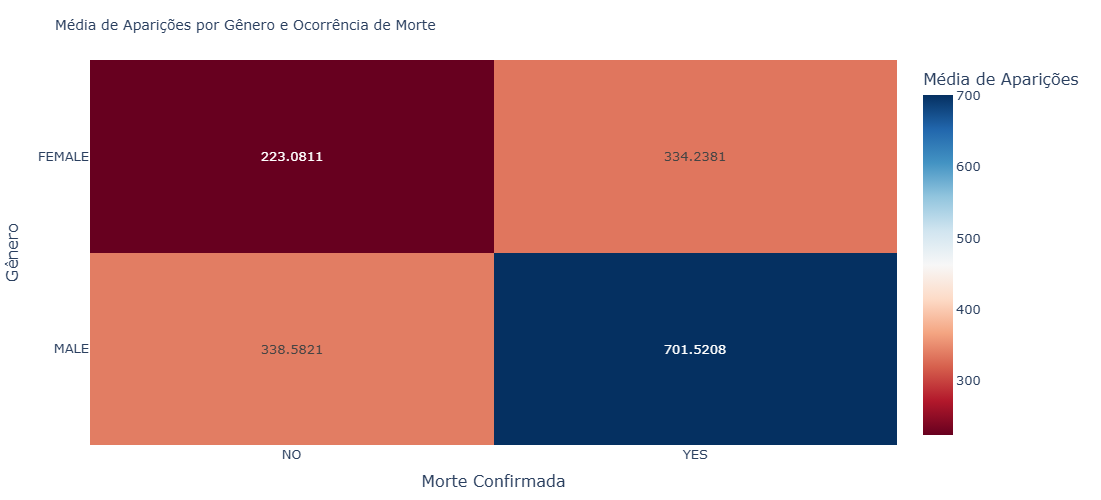

In [30]:
# Garantir que os valores de gênero estejam padronizados
df['gender'] = df['gender'].str.upper()

# Filtrar apenas os gêneros relevantes e valores válidos de death1
df_filtered = df[df['gender'].isin(['FEMALE', 'MALE']) & df['death1'].isin([0, 1])]

# Mapear os valores de death1 para labels legíveis
df_filtered['death_status'] = df_filtered['death1'].map({0: 'NO', 1: 'YES'})

# Calcular a média de aparições por combinação de gênero e morte
heatmap_data = df_filtered.groupby(['gender', 'death_status'])['appearances'].mean().reset_index()
heatmap_data = heatmap_data.pivot(index='gender', columns='death_status', values='appearances')

# Criar mapa de calor
fig = px.imshow(
    heatmap_data,
    text_auto=True,
    color_continuous_scale='RdBu',
    aspect='auto',
    labels=dict(x="Morte Confirmada (Death1)", y="Gênero", color="Média de Aparições"),
    title="Média de Aparições por Gênero e Ocorrência de Morte"
)

# Ajustes visuais
fig.update_layout(
    title_font_size=14,
    font=dict(size=13),
    xaxis_title="Morte Confirmada",
    yaxis_title="Gênero",
    margin=dict(t=60, b=40),
    plot_bgcolor='white',
    paper_bgcolor='white',
    height=500,
    width=700
)

fig.show()

# Salvando o gráfico como uma imagem PNG
fig.write_image('C:/Users/Rubeus/Documents/avengers/images/fig_11.png', width=1200, height=700, scale=3)

- A análise sugere que a morte está fortemente associada à relevância do personagem na narrativa - especialmente entre homens, que os personagens mortos têm mais que o dobro de aparições em relação aos vivos.

- Mesmo quando morrem, personagens femininas aparecem menos que personagens masculinos que não morreram.

- Personagens que não morrem são, em geral, menos explorados. Isso pode indicar que alguns personagens "menores", de apoio ou que servem como composição de equipe, não têm arcos complexos o suficiente para justificar uma morte narrativa, e por isso aparecem menos também.